# Homework 6

Daniil Sherki

### Task 1:
Investigate the effect of regularisation on the solution of the following inverse problem. The vector m is 40-dimensional. Four measurements related to m have been made.
$$d_1=m_4$$
$$d_2=m_5$$<br>
$$d_3=\frac{1}{2}(m_{12}+m_{13})$$
$$d_4=m_{31}−m_{30}$$
The problem is clearly underdetermined. Find solutions by minimising the following objective function.
$$S(m)=\frac{1}{2}(m−m_0)^TW(m−m_0)+\frac{1}{2}(Gm−d_{obs})^T(Gm−d_{obs})$$
with the following regularisation terms:
$$W=I$$
$$W=D^T D$$
$$W=(D^2)^T D^2$$
$$W=(D^2)^T D^2+0.05 I $$

With observed data,
$$d_{obs}=
\begin{pmatrix}
5.735 \\
2.577 \\
4.409 \\
0.3497
\end{pmatrix}$$
and with a prior estimate $m_0=5.5$.
Note that here, $D^2$ denotes the finite difference approximation to the second derivative operator $(−1m_{i−1}+2m_i−1m_{i+1})$.

Plot your estimates for each regularisation term.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from scipy.optimize import minimize
from sympy import symbols, integrate

import warnings
warnings.filterwarnings('ignore')

In [27]:
#Initial data:

#Prior estimate vector:
m_0 = 5.5
m0 = m_0 * np.ones((40,1), dtype='single')


#Measured data:
dobs = np.array([5.735, 2.577, 4.409, 0.3497])

In [28]:
# Define finite difference operators
def D(m):
    return np.diff(m)

def D2(m):
    return np.diff(np.diff(m))

# Define objective function and gradient
def objective_function(m, regularization_type):
    W = np.identity(len(m))
    if regularization_type == 2:
        W = np.dot(D(m).T, D(m))
    elif regularization_type  == 3:
        W = np.dot(D2(m).T, D2(m))
    else:
        W = np.dot(D2(m).T, D2(m)) + 0.05*np.identity(len(m))

    G = np.zeros((4, len(m)))
    G[0, 3] = 1
    G[1, 4] = 1
    G[2, 11:13] = 0.5
    G[3, 31] = 1
    G[3, 30] = -1

    S = 0.5 * np.dot(np.dot((m - m_0).T, W), m - m_0) + 0.5 * np.dot(np.dot((np.dot(G, m) - dobs).T, np.identity(4)), np.dot(G, m) - dobs)
    return S

def gradient(m, regularization_type):
    W = np.identity(len(m))
    if regularization_type == 2:
        W = np.dot(D(m).T, D(m))
    elif regularization_type == 3:
        W = np.dot(D2(m).T, D2(m))
    else:
        W = np.dot(D2(m).T, D2(m)) + 0.05*np.identity(len(m))

    G = np.zeros((4, len(m)))
    G[0, 3] = 1
    G[1, 4] = 1
    G[2, 11:13] = 0.5
    G[3, 31] = 1
    G[3, 30] = -1

    grad = np.dot(W, (m - m_0)) + np.dot(np.dot(G.T, np.identity(4)), np.dot(G, m) - dobs)
    return grad

### a) First case

$$W = I $$

In [29]:
sol1 = minimize(objective_function, m0, args=(1), jac=gradient, method='L-BFGS-B').x

### b) Second case :

$$W = D^TD$$

In [30]:
sol2 = minimize(objective_function, m0, args=(2), jac=gradient, method='L-BFGS-B').x

### c) Third case:

$$W = (D^2)^TD^2$$


In [31]:
sol3 = minimize(objective_function, m0, args=(3), jac=gradient, method='L-BFGS-B').x

### d) Fourth case:

$$W = (D^2)^TD^2 + 0.05I$$


In [32]:
sol4 = minimize(objective_function, m0, args=(4), jac=gradient, method='L-BFGS-B').x

### e) Plotting results:

In [33]:
d = []
for sol in [sol1, sol2, sol3, sol4]:
    d_cur = [sol[3], sol[4], 1/2 * (sol[11] + sol[12]), sol[31] - sol[30]]
    d.append(d_cur)

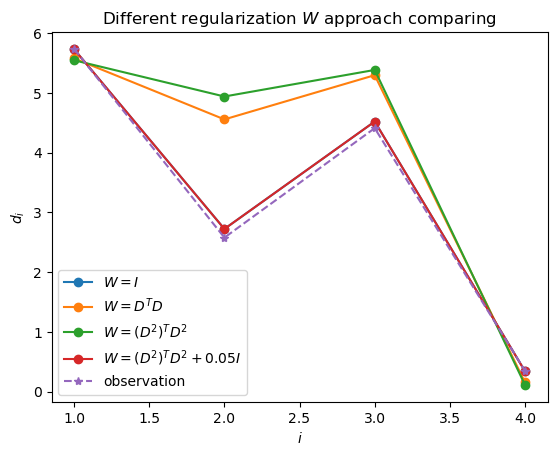

In [34]:
for d_vec, label in zip(d,[fr'$W=I$',fr'$W=D^T D$',fr'$W=(D^2)^T D^2$',fr'$W=(D^2)^T D^2+0.05 I$']):
    plt.plot(range(1,len(d_vec)+1), d_vec, label=label, marker = 'o')
plt.plot(range(1,len(d_obs)+1), d_obs, label = 'observation', ls='--', marker = '*')
plt.legend()
plt.ylabel(fr'$d_i$')
plt.xlabel(fr'$i$')
plt.title(fr'Different regularization $W$ approach comparing')
plt.show()

### Task 2:
Let a point be picked at random (uniform density) in the unit square. Compute the probability that it is in the triangle bounded by $x=0$, $y=0$, and $x+y=1$. Recompute the probability if $fX(x)=2x$ and $fY(y)=2(1−𝑦)$ and $x$ and $y$ are independent random variables.

### a) Probability that it is in the triangle bounded by $x=0$, $y=0$, and $x+y=1$:

$P = \int_{0}^1 \int_0 ^{1-y} \mathrm{d}x \mathrm{d}y = \int_0^1 (1-y)\mathrm{d}y = 1 - \frac{1}{2} = \frac{1}{2}$

In [35]:
x, y = symbols('x y')
integral_expr = integrate(1, (x, 0, 1-y), (y, 0, 1))
result = integral_expr.evalf()
print(f'Probability is {result :.2f}')

Probability is 0.50


### b) Probability if $fX(x)=2x$ and $fY(y)=2(1−y)$:

$$P = \int_{0}^1 \int_0^{1-y} 2x(2(1-y)) \mathrm{d}x \mathrm{d}y = 4 \int_{0}^1 \int_0^{1-y} (x - xy) \mathrm{d}x \mathrm{d}y = 4\int_{0}^1 \int_0 ^{1-y}x \mathrm{d}x \mathrm{d}y - 4\int_{0}^1 \int_0 ^{1-y} xy \mathrm{d}x \mathrm{d}y = \\2 \int_{0}^1 (1 - 2y + y^2)\mathrm{d}y - 2 \int_{0}^1 (y-2y^2 +y^3)\mathrm{d}y = 2 \left[1- 1 + \frac{1}{3}\right] - 2 \left[\frac{1}{2} - \frac{2}{3} + \frac{1}{4} \right] = \frac{1}{2}$$

In [36]:
x, y = symbols('x y')
integral_expr = integrate(2*x*2*(1-y), (x, 0, 1-y), (y, 0, 1))
result = integral_expr.evalf()
print(f'Probability is {result :.2f}')

Probability is 0.50


### Task 3:
For the following two examples, compute the expectations of $X$, $Y$ and $E[XY]$. Compute the covariance of $X$ and $Y$. Are the two variables correlated? Are the two variables independent? For both cases, what is the conditional probability that $x=1$ given that $y=1$?

Case 1. $X$ and $Y$ are discrete random variables with joint probability:

|   | y=0 | y=1 | y=2 |
|---|:---:|:---:|:---:|
| x=0 | 0.1 | 0.3 | 0.1 |
| x=1 | 0.0 | 0.2 | 0.3 |

Case 2. $X$ and $Y$ are discrete random variables with joint probability:

|   | y=-1 | y=0 | y=1 |
|---|:----:|:---:|:---:|
| x=0 | 0.00 | 0.33 | 0.00 |
| x=1 | 0.33 | 0.00 | 0.33 |

### Case 1

### a) Expactations $E(X)$, $E(Y)$ and $E(XY)$:

$$ E(X) = \sum_x x P_x$$

$$E(Y) = \sum_y y P_y $$
$$E(XY) = \sum_{xy} xy P_x P_y $$

In [37]:
# Define the joint probability distribution
joint_prob = [[0.1, 0.3, 0.1],
              [0.0, 0.2, 0.3]]

# Compute the expectations of X and Y\
def expectations(joint_prob,X=[0,1],Y=[0,1,2]):
    ex = 0
    ey = 0
    exy = 0
    for i, x in enumerate(X):
        for j,y in enumerate(Y):
            ex += x * joint_prob[i][j]
            ey += y * joint_prob[i][j]
            exy += x*y*joint_prob[i][j]

    return ex, ey, exy

In [38]:
ex, ey, exy = expectations(joint_prob,[0,1],[0,1,2])
print("E[X] =", ex)
print("E[Y] =", ey)
print("E[XY] =", exy)

E[X] = 0.5
E[Y] = 1.2999999999999998
E[XY] = 0.8


### b) Covariance of $X$ and $Y$, correlation and dependency:
$$Cov(X, Y) = E(XY) - E(X)E(Y)$$

In [39]:
# Compute the covariance of X and Y
def covariance(ex, ey, exy):
    cov_xy = exy - ex*ey
    return cov_xy

cov_xy = covariance(ex, ey, exy)
print("Cov(X,Y) =", cov_xy)

Cov(X,Y) = 0.15000000000000013


$Cov(X,Y) > 0$ that means the variables are positive correlated (dependent)

### c) Conditional probability that  $x=1$  given that  $y=1$:

$$ P (x=1 | y=1) = \frac{P(x=1 \cap y=1)}{P(y=1)}$$


In [40]:
# Compute the marginal probabilities

def cond_prob_given_y_equals_1(joint_prob_table, one = 1):
    sum_over_x = 0
    sum_over_all = 0
    for i in range(len(joint_prob_table)):
        sum_over_all += joint_prob_table[i][1]
        if i == one:
            sum_over_x += joint_prob_table[i][1]
    return sum_over_x / sum_over_all

px1_given_y1_bayes = cond_prob_given_y_equals_1(joint_prob)
print("P(X=1|Y=1) =", px1_given_y1_bayes)


P(X=1|Y=1) = 0.4


### Case 2

In [41]:
joint_prob = [[0.00, 0.33, 0.00],
              [0.33, 0.00, 0.33]]

ex, ey, exy = expectations(joint_prob,[0,1],[-1,0,1])
cov_xy = covariance(ex, ey, exy)
px1_given_y1_bayes = cond_prob_given_y_equals_1(joint_prob,0)
print("E[X] =", ex)
print("E[Y] =", ey)
print("E[XY] =", exy)
print("Cov(X,Y) =", cov_xy)
print("P(X=1|Y=1) =", px1_given_y1_bayes)

E[X] = 0.66
E[Y] = 0.0
E[XY] = 0.0
Cov(X,Y) = 0.0
P(X=1|Y=1) = 1.0


$Cov(X,Y) = 0$ that means the variables are independent